## 1- Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Visualizing the plots in the same notebook
%matplotlib inline
# In order to reproduce the code
np.random.seed(0)

## 2 - Importing the dataset

In [2]:
dataset = pd.read_csv('iris.csv')

In [3]:
dataset.shape

(150, 5)

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 3- Selecting a susbset of the original dataset

In [5]:
data = dataset[['petal_length', 'petal_width']]

In [6]:
data.shape

(150, 2)

In [7]:
data.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


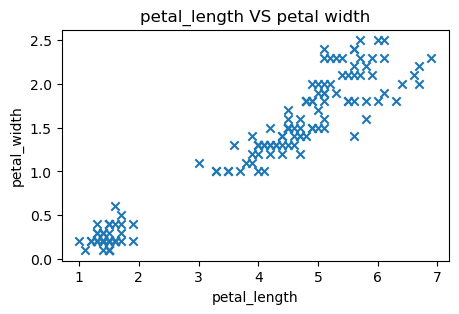

In [8]:
plt.figure(figsize=(5,3))
plt.scatter(data['petal_length'],data['petal_width'],marker='x')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal_length VS petal width')
plt.show()

## 4- The independent and the dependent variables

In [9]:
X = data['petal_length'].values.reshape(-1,1)
y = data['petal_width'].values.reshape(-1,1)

In [10]:
print(X.shape)
print(y.shape)

(150, 1)
(150, 1)


# Simple linear regression model

## 1- Initializing parameters

In [11]:
def initializing_parameters(dim):
    w = np.zeros((dim,1))
    b = 0.
    return w,b

In [12]:
w,b = initializing_parameters(X.shape[1])

In [13]:
print(f"w= {w}")
print(f"b= {b}")

w= [[0.]]
b= 0.0


## 2- Defining the model

In [14]:
def model(w,b,X):
    return np.dot(X,w.T) + b

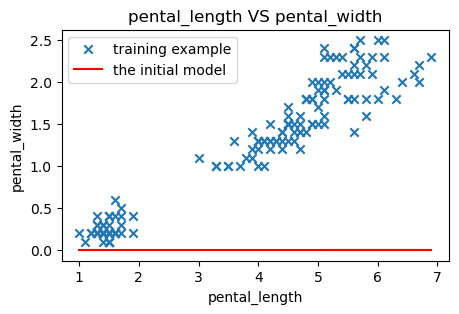

In [15]:
plt.figure(figsize=(5,3))
plt.scatter(X,y,marker='x', label='training example')
plt.plot(X, model(w,b,X),c='red', label='the initial model')
plt.xlabel('pental_length')
plt.ylabel('pental_width')
plt.title('pental_length VS pental_width')
plt.legend()
plt.show()

## 3- Computing the cost function

In [16]:
def cost_function(w,b,X,y):
    m = X.shape[0]
    return 1/(2*m) * np.sum((model(w,b,X)-y)**2)

In [17]:
print(cost_function(w,b,X,y))

1.0076666666666665


## 4- The gradient descent

In [18]:
def gradient(w,b,X,y):
    m = X.shape[0]
    dj_dw = 1/m * np.dot(X.T,model(w,b,X)-y)
    dj_db = 1/m * np.sum(model(w,b,X)-y)
    return dj_dw, dj_db

In [19]:
def gradient_descent(w,b,X,y,learning_rate=0.01,epochs=1000):
    history = []
    for i in range(epochs):
        dj_dw, dj_db = gradient(w,b,X,y)
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db
        history.append(cost_function(w,b,X,y))
    return w,b,history

## 5- Training the model

In [20]:
learning_rate = 0.01
epochs = 1000
w,b,history = gradient_descent(w,b,X,y,learning_rate, epochs)

In [21]:
print(f"w = {w}")
print(f"b = {b}")

w = [[0.39907509]]
b = -0.2878444705121055


In [22]:
print(f"Iteration {1:3d}: {history[0]}")
for i in range(len(history)):
    if (i+1)%100 == 0:
        print(f"Iteration {i:3d}: {history[i]}")

Iteration   1: 0.6892720814748193
Iteration  99: 0.03332366980593388
Iteration 199: 0.029787698647092836
Iteration 299: 0.02727836378599268
Iteration 399: 0.025497590933988883
Iteration 499: 0.02423384889637042
Iteration 599: 0.023337022590956467
Iteration 699: 0.022700581451752
Iteration 799: 0.022248925070547945
Iteration 899: 0.021928402913640663
Iteration 999: 0.02170094138017441


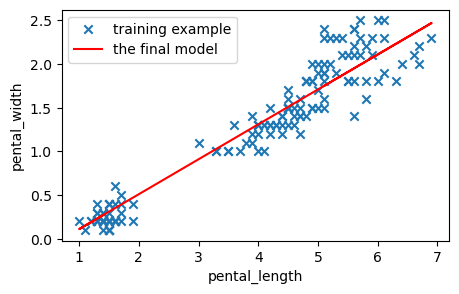

In [23]:
plt.figure(figsize=(5,3))
plt.scatter(X,y,marker='x',label='training example')
plt.plot(X, model(w,b,X),c='red',label='the final model')
plt.xlabel('pental_length')
plt.ylabel('pental_width')
plt.legend()
plt.show()

## 6- The learning curve

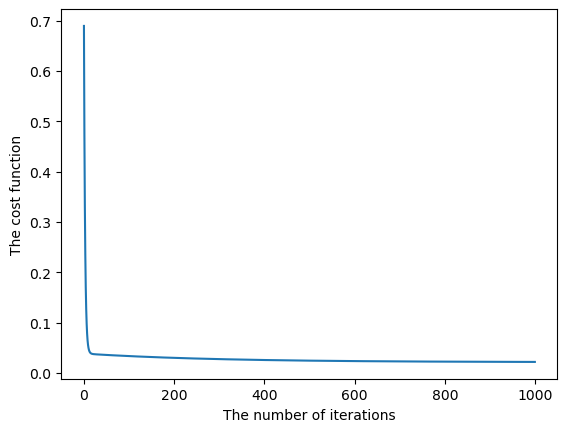

In [24]:
plt.plot(range(epochs),history)
plt.xlabel('The number of iterations')
plt.ylabel('The cost function')
plt.show()

## 7- Evaluating the model - Coefficient of determination

In [25]:
def coef_determination(w,b,X,y):
    RSS = np.sum((y - model(w,b,X))**2)
    TSS = np.sum((y - np.mean(y))**2)
    return 1 - RSS/TSS

In [26]:
print(coef_determination(w,b,X,y))

0.9249792300116273
